In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача 1__

In [2]:
x1 = np.array([30,30,40, 40])
y1 = np.array([37, 47, 50, 60])

x2 = np.array([30,30,40, 40, 20, 20, 50, 50])
y2 = np.array([37, 47, 50, 60, 25, 35, 62, 72])

x3 = np.array([30,30,40, 40, 20, 20, 50, 50, 10, 10, 60, 60])
y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84])

In [3]:
models = [[x1, y1], [x2, y2], [x3, y3]]

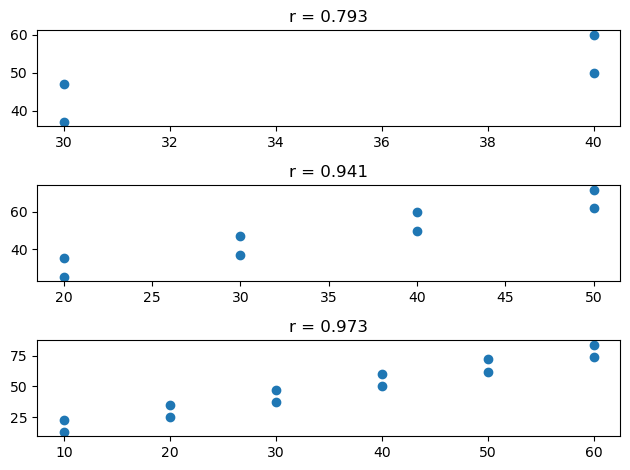

In [4]:
fig, axis = plt.subplots(3, 1)
for i in range(len(models)):
    cor = np.corrcoef(models[i])[0][1]
    axis[i].scatter(models[i][0], models[i][1])
    axis[i].set_title(f'r = {round(cor, 3)}')
    
plt.tight_layout()

In [5]:
# reshape
for i in range(len(models)):
    models[i][0] = models[i][0].reshape(-1, 1)

In [6]:
# regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

for i in range(len(models)):
    model = LinearRegression()
    model.fit(models[i][0], models[i][1])
    r_sq = model.score(models[i][0], models[i][1])
    print(f'model {i + 1}')
    print(f'R2:    {round(r_sq, 3)}')
    print(f'const: {round(model.intercept_, 3)}')
    print(f'beta:  {model.coef_}')
    print('-' * 30)

model 1
R2:    0.628
const: 3.0
beta:  [1.3]
------------------------------
model 2
R2:    0.885
const: 5.1
beta:  [1.24]
------------------------------
model 3
R2:    0.946
const: 5.6
beta:  [1.22571429]
------------------------------


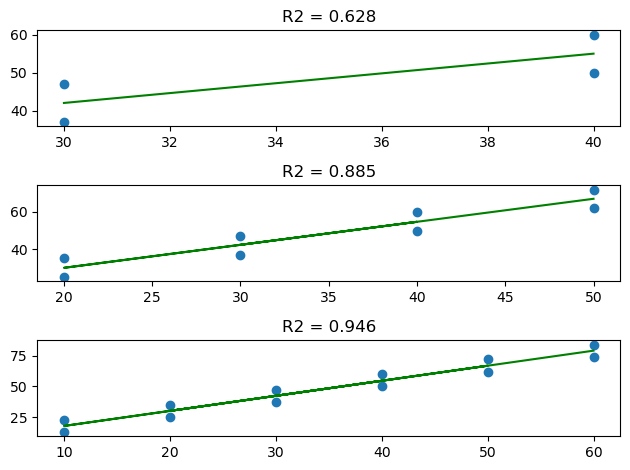

In [7]:
# plot
fig, axis = plt.subplots(3, 1)
for i in range(len(models)):
    x = models[i][0]
    y = models[i][1]
    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    const = model.intercept_
    beta = model.coef_[0]
    
    axis[i].scatter(x, y)
    axis[i].set_title(f'R2 = {round(r_sq, 3)}')
    
    axis[i].plot(x, beta * x + const, 'g')

plt.tight_layout()

__Задача 3__

In [8]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [9]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
x = x.reshape(-1, 1)
model.fit(x, y)
r_sq = model.score(x, y)

const = model.intercept_
beta = model.coef_[0]
const, beta

(3.0000909090909103, 0.5000909090909091)

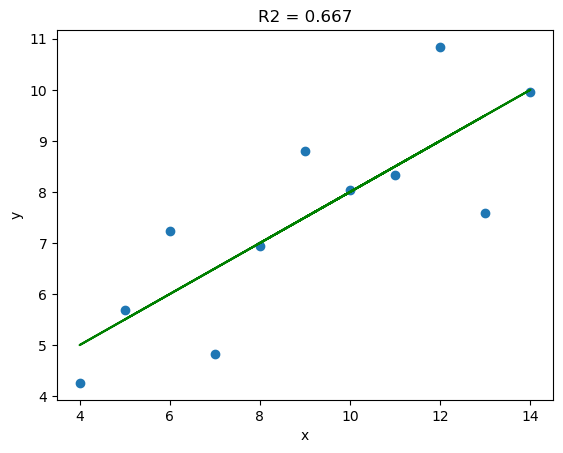

In [10]:
plt.scatter(x, y)
plt.plot(x, beta * x + const, 'g')
plt.title(f'R2 = {round(r_sq, 3)}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__Задача 4__

[[ 0.039      -0.05081818 -1.92127273  1.30909091 -0.17109091 -0.04136364
   1.23936364 -0.74045455  1.83881818 -1.68072727  0.17945455]]


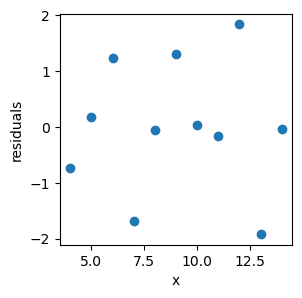

ShapiroResult(statistic=0.9421076774597168, pvalue=0.5455849170684814)

In [11]:
# проверка остатков
from scipy import stats

y_hat = beta * x + const
y_hat = y_hat.reshape(1, -1)
resid = y - y_hat
print(resid)

plt.figure(figsize=(3, 3))
plt.scatter(x, resid)
plt.xlabel('x')
plt.ylabel('residuals')
plt.show()

stats.shapiro(resid)

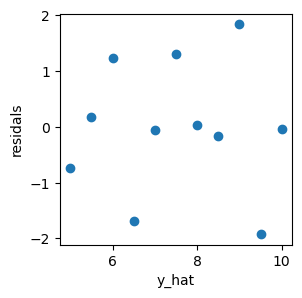

In [12]:
# гомоскедастичность

plt.figure(figsize=(3, 3))
plt.scatter(y_hat, resid)
plt.xlabel('y_hat')
plt.ylabel('residals')
plt.show()

__Задача 5__

In [13]:
# значимость модели

In [14]:
n = x.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 9)

In [15]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.117355029199227

In [16]:
R2 = r_sq
F = (R2 / k1) / ((1 - R2) / k2)
F

17.98994296767698

In [17]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 18 Dec 2022   Prob (F-statistic):            0.00217
Time:                        10:05:26   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

C:\Users\maria\anaconda3_new\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
